In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sn

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

cases_data = pd.read_csv('Assignment Data.csv')
cases_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   local_authority_area  32 non-null     object 
 1   eight_proportion      32 non-null     float64
 2   thirteen_proportion   32 non-null     float64
 3   eighteen_proportion   32 non-null     float64
 4   school_awareness      32 non-null     int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 1.4+ KB


In [2]:
cases_data.head()

,local_authority_area,eight_proportion,thirteen_proportion,eighteen_proportion,school_awareness
0,Barking and Dagenham,0.3434,0.3458,0.4197,41000
1,Barnet,0.1583,0.1726,0.2172,74000
2,Bexley,0.2291,0.2476,0.2875,64000
3,Brent,0.3641,0.3907,0.4110,48000
4,Bromley,0.1970,0.2291,0.2776,63000


In [3]:
cases_data_numeric = pd.get_dummies(cases_data)

In [4]:
cases_data_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 36 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   eight_proportion                             32 non-null     float64
 1   thirteen_proportion                          32 non-null     float64
 2   eighteen_proportion                          32 non-null     float64
 3   school_awareness                             32 non-null     int64  
 4   local_authority_area_Barking and Dagenham    32 non-null     uint8  
 5   local_authority_area_Barnet                  32 non-null     uint8  
 6   local_authority_area_Bexley                  32 non-null     uint8  
 7   local_authority_area_Brent                   32 non-null     uint8  
 8   local_authority_area_Bromley                 32 non-null     uint8  
 9   local_authority_area_Camden                  32 non-null     uint8  
 10  loca

In [7]:
cases_data_final = cases_data_numeric.drop(['local_authority_area_Barking and Dagenham','local_authority_area_Barnet','local_authority_area_Bexley','local_authority_area_Brent','local_authority_area_Bromley','local_authority_area_Camden','local_authority_area_Croydon','local_authority_area_Ealing','local_authority_area_Enfield','local_authority_area_Greenwich','local_authority_area_Hackney','local_authority_area_Hammersmith and Fulham','local_authority_area_Haringey','local_authority_area_Harrow','local_authority_area_Havering','local_authority_area_Hillingdon','local_authority_area_Hounslow','local_authority_area_Islington','local_authority_area_Kensington and Chelsea','local_authority_area_Kingston upon Thames','local_authority_area_Lambeth','local_authority_area_Lewisham','local_authority_area_Merton','local_authority_area_Newham','local_authority_area_Redbridge','local_authority_area_Richmond upon Thames','local_authority_area_Southwark','local_authority_area_Sutton','local_authority_area_Tower Hamlets','local_authority_area_Waltham Forest','local_authority_area_Wandsworth','local_authority_area_Westminster'],axis=1)

cases_data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   eight_proportion     32 non-null     float64
 1   thirteen_proportion  32 non-null     float64
 2   eighteen_proportion  32 non-null     float64
 3   school_awareness     32 non-null     int64  
dtypes: float64(3), int64(1)
memory usage: 1.1 KB


Text(0.5, 1.05, 'Correlation Matrix')

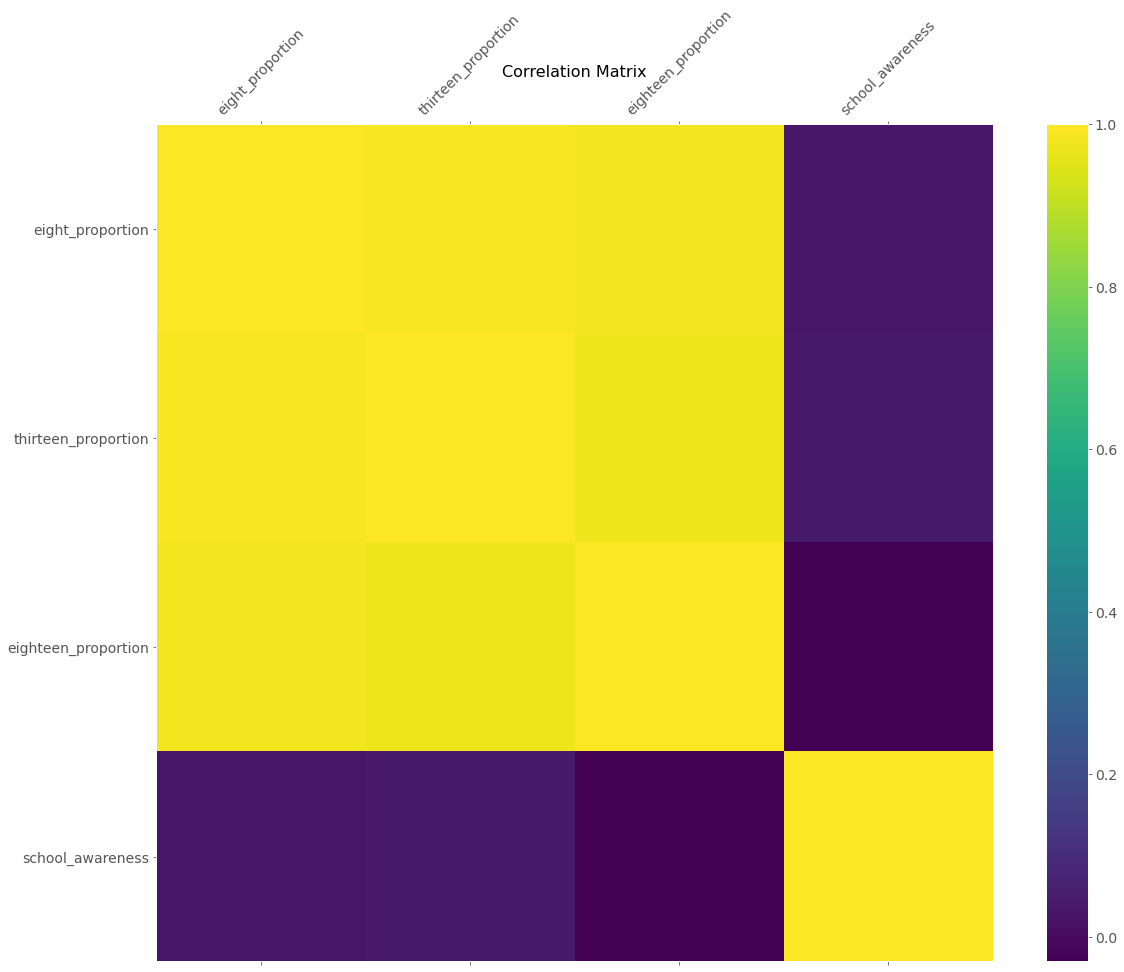

In [8]:
df = cases_data_final
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

In [9]:
cases_data_cases = cases_data_numeric.loc[:,['school_awareness', 'eight_proportion', 'thirteen_proportion', 'eighteen_proportion']]
model_school_awareness_cases = sm.formula.ols(formula='school_awareness~eight_proportion+thirteen_proportion+eighteen_proportion', data=cases_data_cases).fit()
model_school_awareness_cases.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       school_awareness   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     1.248
Date:                Sun, 14 Nov 2021   Prob (F-statistic):              0.311
Time:                        12:31:48   Log-Likelihood:                -353.94
No. Observations:                  32   AIC:                             715.9
Df Residuals:                      28   BIC:                             721.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            6.315e+04   1.48e+04      4.279      0.000    3.29e+04    9.34e+04
eight_proportion     2.205e+05   3.12e+05      0.707      0.486   -4.19e+05     8.6e+05
thirteen_proportion  1.751e+05   2.53e+05      0.693      0.494   -3.42e+05    6.92e+05
eighteen_proportion -3.719e+05   1.99e+05     -1.869      0.072   -7.79e+05    3.57e+04
==============================================================================
Omnibus:                        1.728   Durbin-Watson:                   1.577
Prob(Omnibus):                  0.422   Jarque-Bera (JB):                1.130
Skew:                           0.137   Prob(JB):                        0.568
Kurtosis:                       2.121   Cond. No.                         145.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

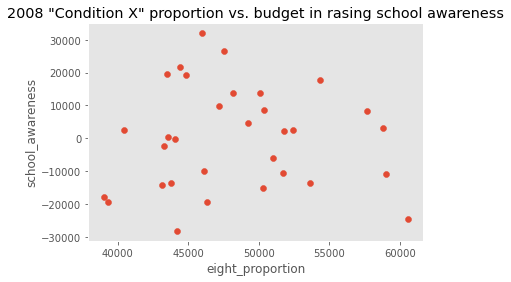

In [10]:
plt.scatter(model_school_awareness_cases.fittedvalues, model_school_awareness_cases.resid)
plt.xlabel('eight_proportion')
plt.ylabel('school_awareness')
plt.title('2008 "Condition X" proportion vs. budget in rasing school awareness')
plt.show()

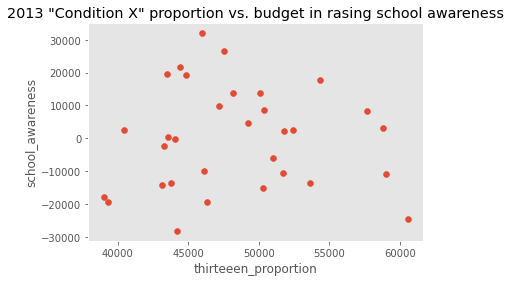

In [11]:
plt.scatter(model_school_awareness_cases.fittedvalues, model_school_awareness_cases.resid)
plt.xlabel('thirteeen_proportion')
plt.ylabel('school_awareness')
plt.title('2013 "Condition X" proportion vs. budget in rasing school awareness')
plt.show()

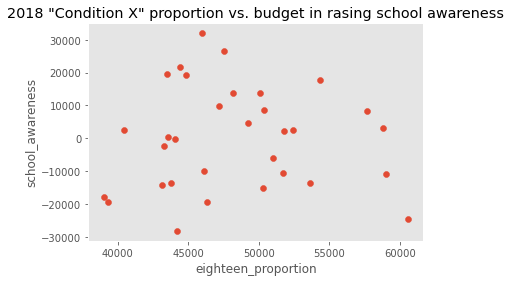

In [12]:
plt.scatter(model_school_awareness_cases.fittedvalues, model_school_awareness_cases.resid)
plt.xlabel('eighteen_proportion')
plt.ylabel('school_awareness')
plt.title('2018 "Condition X" proportion vs. budget in rasing school awareness')
plt.show()

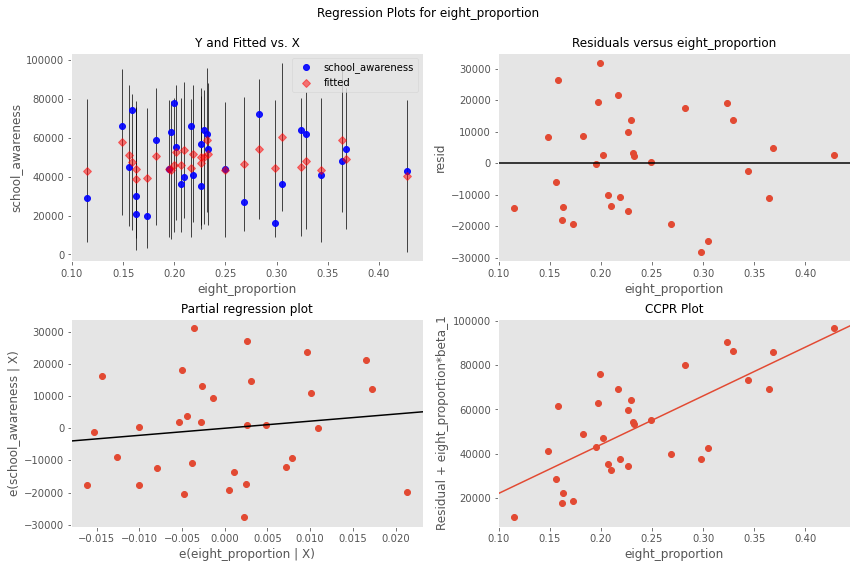

In [13]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model_school_awareness_cases, 'eight_proportion', fig=fig)

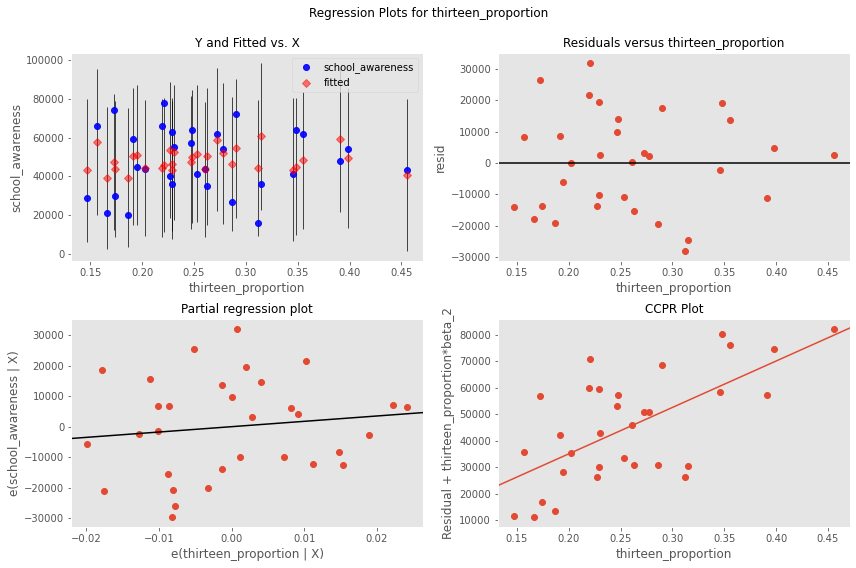

In [14]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model_school_awareness_cases, 'thirteen_proportion', fig=fig)

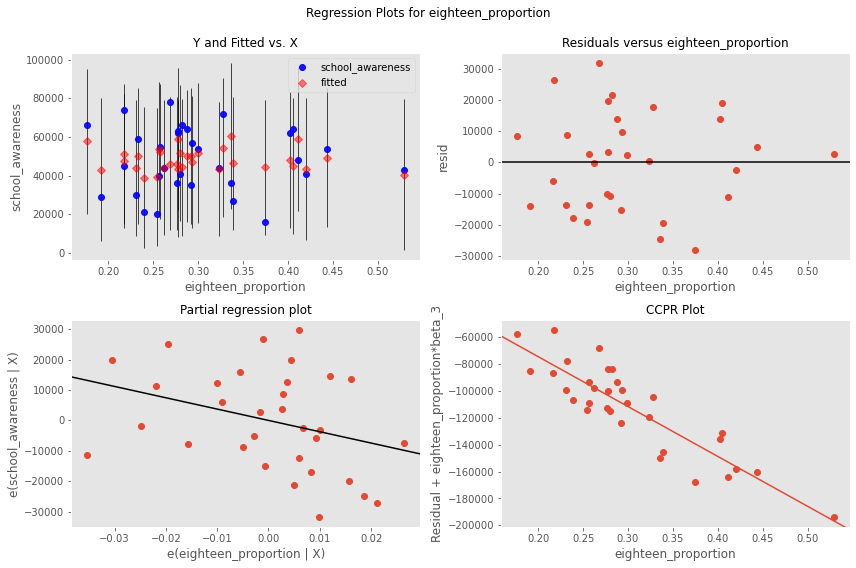

In [15]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model_school_awareness_cases, 'eighteen_proportion', fig=fig)